<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/aq_toposort_dfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topological sort

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 207 (delta 114), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (207/207), 150.74 KiB | 2.64 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [ ]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx

In [ ]:
colors  = ['darkgreen', 'green', 'red', 'blue', 'pink',
           'magenta', 'orange', 'cyan', 'grey']

G = nx.DiGraph()
G.add_node(0, label="undies", style="filled", fillcolor=colors[0])
G.add_node(1, label="pants",  style="filled", fillcolor=colors[1])
G.add_node(2, label="belt",   style="filled", fillcolor=colors[2])
G.add_node(3, label="shirt",  style="filled", fillcolor=colors[3])
G.add_node(4, label="tie",    style="filled", fillcolor=colors[4])
G.add_node(5, label="jacket", style="filled", fillcolor=colors[5])
G.add_node(6, label="socks",  style="filled", fillcolor=colors[6])
G.add_node(7, label="shoes",  style="filled", fillcolor=colors[7])
G.add_node(8, label="watch",  style="filled", fillcolor=colors[8])

G.add_edges_from([(0, 1), (0, 7),
                  (1, 2), (1, 7),
                  (2, 5),
                  (3, 2), (3, 4),
                  (4, 5),
                  (6, 7)])

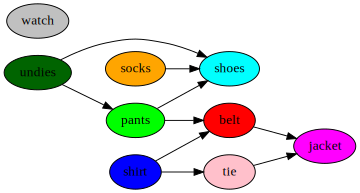

In [ ]:
gs.nx2gv(G, nodeinfo=True)

In [ ]:
def topoSortInDegree(G):
  indegree = [0]*G.number_of_nodes();
  stack = []
  for u in G.nodes:
    indegree[u] = G.in_degree(u)
    if indegree[u] == 0:
      stack.append(u)

  toposort = []
  while stack:
    u = stack.pop()
    toposort.append(G.nodes[u]['label'])
    for v in G.neighbors(u):
      indegree[v] -= 1
      if indegree[v] == 0:
        stack.append(v)

  return toposort

In [ ]:
topoSortInDegree(G)

['watch',
 'socks',
 'shirt',
 'tie',
 'undies',
 'pants',
 'shoes',
 'belt',
 'jacket']

In [ ]:
def _dfs(G, u, ts):
  if not G.nodes[u]['visited']:
    G.nodes[u]['visited'] = True
    for v in G.neighbors(u):
      if not G.nodes[v]['visited']:
        _dfs(G, v, ts)

    #ts.append(u)
    ts.append(G.nodes[u]['label'])


def topoSortDFS(G):
  for u in G.nodes:
    G.nodes[u]['visited'] = False

  toposort = []
  for u in G.nodes:
    _dfs(G, u, toposort)

  return list(reversed(toposort))

In [ ]:
topoSortDFS(G)

['watch',
 'socks',
 'shirt',
 'tie',
 'undies',
 'pants',
 'shoes',
 'belt',
 'jacket']